In [1]:
#!/usr/bin/env python 

In [1]:
# Author: Mbonu chinedum 
# Company: Analytics Intelligence 
# Email: cboy.chinedu@gmail.com 
# Date Created: 26-Sep-2019 

In [2]:
# Importing the necessary packages. 
import numpy as np 
import pandas as pd 
import seaborn as sns  
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD   
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_classif 
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import make_scorer 
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import ShuffleSplit 

Using TensorFlow backend.


In [3]:
# setting the plot parameters 
%matplotlib inline 

sns.set(style='dark')

In [4]:
# loading in the dataset into memory 
dataset = 'Students.csv'
df = pd.read_csv(dataset)
output = df['TestScore']
input_feature = df.drop(['TestScore'], axis=1)

# Removing the studentid column
studentid = df.pop('StudentId')
ID = df.pop('ID')

In [5]:
# Showing the Total number of samples and its labels. 
df.count() 

Gender        9880
Age           9880
Attendance    9880
TestScore     9880
dtype: int64

In [6]:
# Description of the dataset including the mean, count, standard deviation, max, and min
df.describe() 

,Age,Attendance,TestScore
count,9880.000000,9880.000000,9880.000000
mean,49.367206,0.730917,63.089545
std,14.975675,0.151874,17.736368
min,1.000000,0.150000,0.010000
25%,39.000000,0.630000,51.677500
50%,49.000000,0.750000,64.440000
75%,60.000000,0.850000,76.150000
max,100.000000,1.000000,99.950000


In [7]:
# Displaying the data for 5 sample point  
df.head(5)

,Gender,Age,Attendance,TestScore
0,male,58,0.81,64.76
1,male,54,0.55,35.11
2,male,50,0.62,60.24
3,male,34,0.84,69.97
4,male,58,0.59,36.89


In [8]:
# Creating a Dictionary to convert the males to 1, and females to 0 
d = {'male': 1, 'female': 0}
df['Gender'] = df['Gender'].map(d)
df.head(5)

,Gender,Age,Attendance,TestScore
0,1,58,0.81,64.76
1,1,54,0.55,35.11
2,1,50,0.62,60.24
3,1,34,0.84,69.97
4,1,58,0.59,36.89


## Visualization of The Data 

So we need to see the data and understand it, Before chosing which input column should be used in training our model to make the right and Accurate predictions. 

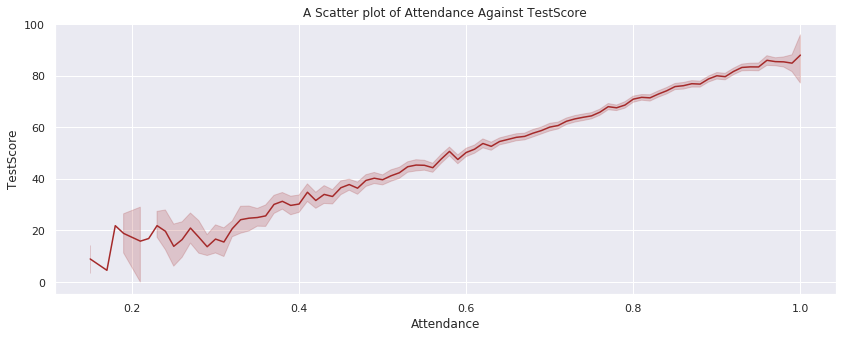

In [14]:
# Visualization of the data by plotting a graph of attendance against testscore
# Thus we can see that the more you attend classes, there would be a high probability that the testscore would
# increase. 
plt.figure(figsize=(14, 5))

# plotting a graph of Attendance against the testscore 
plt.title('A Scatter plot of Attendance Against TestScore')
sns.lineplot(x='Attendance', y='TestScore', data=df, color='brown')
plt.grid(True)
plt.show() 


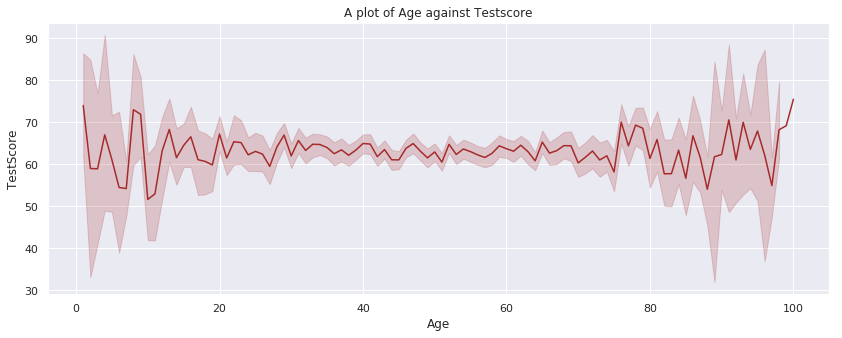

In [10]:
# We could see here that the age dataframe has alot of 
# outliers and could cause our model to have a decreased rate 
# in prediction, so because of this, it is adviced not to use it 
# in fitting the model 
plt.figure(figsize=(14, 5))
plt.title('A plot of Age against Testscore')
sns.lineplot(x='Age', y='TestScore', data=df, color='brown')
plt.grid(True)
plt.show() 

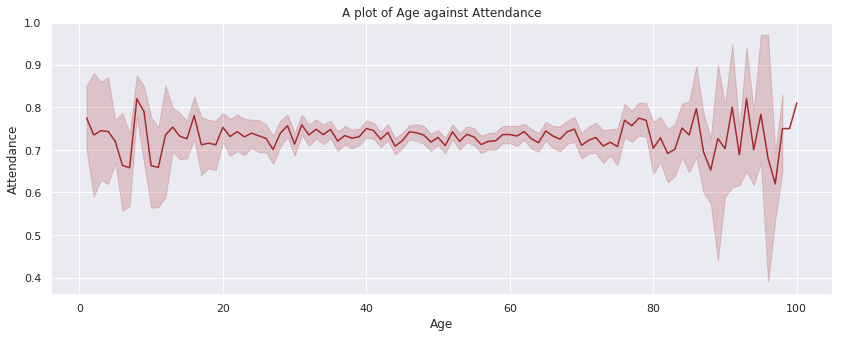

In [11]:
# ploting the graph of Age against Attendance 
plt.figure(figsize=(14, 5))
plt.title('A plot of Age against Attendance')
sns.lineplot(x='Age', y='Attendance', data=df, color='brown')
plt.grid(True)
plt.show() 

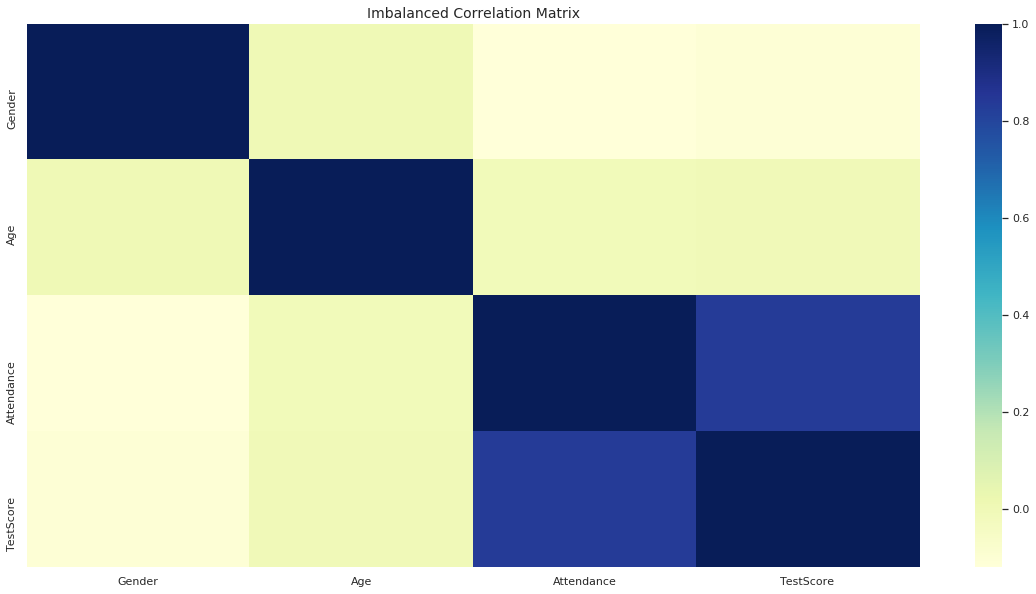

In [15]:
# Sample figsize in inches
fig, ax = plt.subplots(figsize=(20,10))         
# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Imbalanced Correlation Matrix", fontsize=14)
plt.show()

In [17]:
# Visualizing the Clean Dataset 
df.head(5)

,Gender,Age,Attendance,TestScore
0,1,58,0.81,64.76
1,1,54,0.55,35.11
2,1,50,0.62,60.24
3,1,34,0.84,69.97
4,1,58,0.59,36.89


In [18]:
# Saving the dataset into the input(x) feature and the output(y) feature 
# Converting the input variables(X) into a numpy array using the values function in pandas
X = df.iloc[:, 0:3]
X = df.iloc[:, 0:3].values

# # 
# scaler = MinMaxScaler(feature_range=(0, 1))
# X_scaled = scaler.fit_transform(X)

# Converting the Output features (y) into a numpy array 
y = df.iloc[:, -1].values


In [19]:
# Splitting our dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 30)

In [20]:
# Displaying the shape of the Training data  
print(X_train.shape)
print(y_train.shape)

(7904, 3)
(7904,)


In [21]:
# Displaying the shape of the Test Data 
print(X_test.shape)
print(y_test.shape)

(1976, 3)
(1976,)


In [22]:
# Creating a function for the performance metric 
def performance_metric(y_true, y_predict):
    from sklearn.metrics import r2_score 
    score = r2_score(y_true, y_predict)
    return score 

In [23]:
# creating a function for building the model 
def fit_model(X, y): 
    cv_sets = ShuffleSplit(X.shape[0], test_size=0.20, random_state=0)
    # create a decision tree regressor 
    regressor = DecisionTreeRegressor() 
    # create a dictionary for the parameter max_depth 
    params = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
    # transform the performance metric into a scoring function using the make scorer 
    scoring_fnc = make_scorer(performance_metric)
    # create the grid search cv object 
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)
    # fit the grid search object to the data to compute the optimal model 
    grid = grid.fit(X, y)
    # return the optimal model after fitting the data 
    return grid.best_estimator_ 

# making predictions 
# fitting the model to the training data 
reg = fit_model(X_train, y_train)    

In [29]:
# showing the accuracy of the model 
pred = reg.predict(X_test)
score = performance_metric(y_test, pred)
print("Accuracy: " + str(score))

Accuracy: 0.6926709847423791


## Model Prediction

In [23]:
# So for a student which has (gender=male=1,attendance=0.81, testscore=?)
# we then create a numpy array to hold the various properties before fitting it into the 
# model for prediction of the Actual TestScore. 
x_new = np.array([0, 0.80])
x_new = x_new.reshape(1, -1)

In [24]:
# So the test Score for this new Student would be... 
test_score = model.predict(x_new)
print('The Test Score is: {}'.format(test_score))

The Test Score is: [69.97862255]


In [24]:
# Fitting the linear Regression to the dataset 
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 

In [28]:
# fitting the model using linear regression 
model.fit(X, y)

# checking the score of the model 
model.score(X, y)

0.6966257034010926

In [48]:
#
x_new = np.array([0.62]).reshape(1, -1)

# 
x_new

## Using Polynomial feature to fit the input features. 

In [76]:
# Adding the polynomial for better fitting of the data 
from sklearn.preprocessing import PolynomialFeatures 
poly = PolynomialFeatures(degree=8)
poly_features = poly.fit_transform(X)
poly.fit(X, y)

PolynomialFeatures(degree=8, include_bias=True, interaction_only=False,
                   order='C')